<a href="https://colab.research.google.com/github/park-hyunchun/DAP/blob/main/bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Korean Premium and Investor Trends in **Bitcoin**
**목적**:
한국 프리미엄은 한국에서 거래되는 암호화폐의 시세가 해외 거래소 시세와 비교해 얼마나 높은가를 뜻하는 단어이다. 해외 암호화폐 거래소와 비교하여 한국 프리미엄은 얼마인지, 한국 프리미엄에 따라 투자자들의 거래량에 영향을 미치는지에 대해서 알아본다. 또한 암호화폐의 상승, 하락 그리고 가격에 따라 투자자들의 거래량이 영향을 어느정도 미치는지에 대해서 알아본다.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Bitcoin dataframe
FinanceDataReader을 이용하여 비트코인 일봉 차트를 가져온다.

In [2]:
pip install -U finance-datareader

#BTC/USD
2018년도부터 현재까지의 달러 기준 비트코인 일봉 차트

In [3]:
import FinanceDataReader as fdr

df_BTCUSD = fdr.DataReader('BTC/USD', '2018')
print(df_BTCUSD.head())
print(df_BTCUSD.tail())


              Close     Open     High      Low    Volume  Change
Date                                                            
2018-01-01  13444.9  13850.5  13921.5  12877.7   78430.0 -0.0293
2018-01-02  14754.1  13444.9  15306.1  12934.2  137730.0  0.0974
2018-01-03  15156.6  14754.1  15435.0  14579.7  106540.0  0.0273
2018-01-04  15180.1  15156.5  15408.7  14244.7  110970.0  0.0015
2018-01-05  16954.8  15180.1  17126.9  14832.4  141960.0  0.1169
              Close     Open     High      Low   Volume  Change
Date                                                           
2021-12-16  47628.2  48876.6  49387.8  47543.9  48200.0 -0.0254
2021-12-17  46172.2  47630.4  47997.2  45523.8  67500.0 -0.0306
2021-12-18  46856.2  46171.8  47330.2  45513.4  36930.0  0.0148
2021-12-19  46704.5  46855.7  48270.2  46438.4  44050.0 -0.0032
2021-12-20  46717.1  46703.4  47171.2  46251.6  45120.0  0.0003


#BTC/KRW
2018년도부터 현재까지의 원화 기준 비트코인 일봉 차트

In [4]:
df_BTCKRW = fdr.DataReader('BTC/KRW', '2018')
print(df_BTCKRW.head())
print(df_BTCKRW.tail())

               Close      Open      High       Low   Volume  Change
Date                                                               
2018-01-01  18655000  19208000  19296000  18362000  10240.0 -0.0288
2018-01-02  19838000  18655000  20800000  18570000  17460.0  0.0634
2018-01-03  20419000  19838000  20810000  19800000  15670.0  0.0293
2018-01-04  21576000  20419000  21830000  19891000  14730.0  0.0567
2018-01-05  25026000  21576000  25988000  21046000  25290.0  0.1599
               Close      Open      High       Low  Volume  Change
Date                                                              
2021-12-16  59547000  61046000  61502000  59323000   680.0 -0.0246
2021-12-17  57914000  59547000  59948000  57243000   730.0 -0.0274
2021-12-18  58310000  57914000  58799000  57102000   390.0  0.0068
2021-12-19  58284000  58310000  59661000  57997000   470.0 -0.0004
2021-12-20  57940000  58284000  58499000  57669000   910.0 -0.0059


두 차트를 그래프화

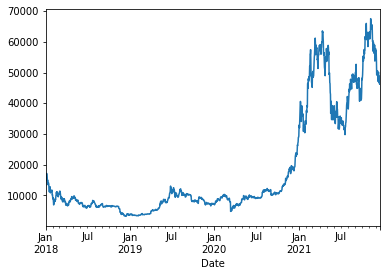

In [5]:
df_BTCUSD['Close'].plot()

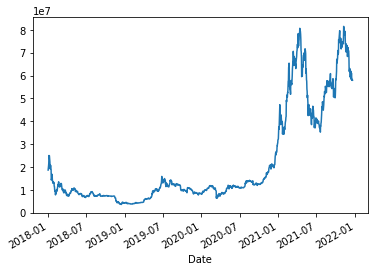

In [6]:
df_BTCKRW['Close'].plot()

#환율 계산 및 달러 기준을 원화로
한국 프리미엄을 계산하기 위해서는 달러를 원화로 바꾸어 빼주어야 하는데 이때 환율이 필요하다.

In [7]:
USD_KRX = fdr.DataReader('USD/KRW', '2018')
idx = pd.date_range('01-01-2018', '12-20-2021')
USD_KRX.index = pd.DatetimeIndex(USD_KRX.index)
USD_KRX = USD_KRX.reindex(idx)
USD_KRX = USD_KRX.fillna(method='ffill')
USD_KRX.head()

,Close,Open,High,Low,Change
2018-01-01,1066.60,1067.38,1067.80,1065.61,-0.0007
2018-01-02,1063.21,1066.60,1068.51,1059.97,-0.0032
2018-01-03,1064.80,1062.88,1068.16,1062.48,0.0015
2018-01-04,1062.28,1065.13,1069.31,1061.53,-0.0024
2018-01-05,1062.09,1061.83,1064.06,1060.20,-0.0002


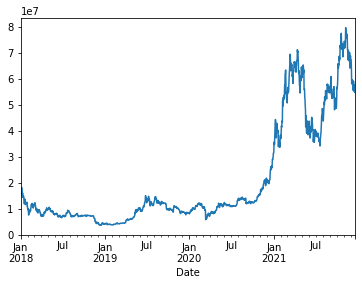

In [8]:
df_BTCUSD['Close'] = df_BTCUSD['Close'] * USD_KRX['Close']
df_BTCUSD['Close'].plot()

#국내 시장 비트코인 그래프와 해외 시장 비트코인 그래프의 비교

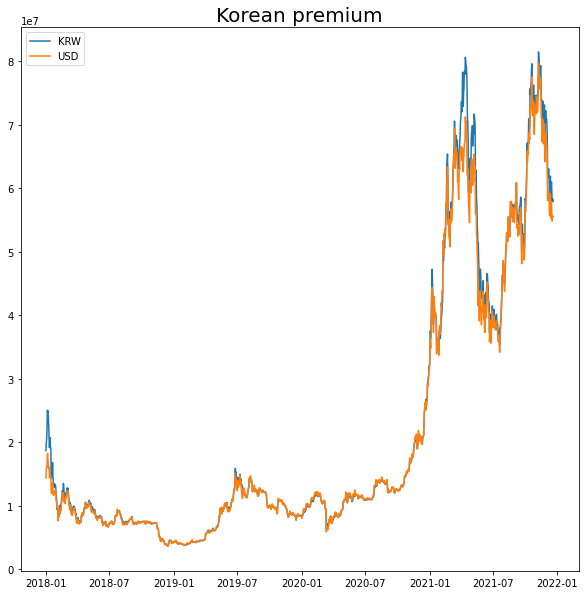

In [9]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(df_BTCKRW['Close'], label='KRW')
ax.plot(df_BTCUSD['Close'], label='USD')

ax.legend()

plt.title("Korean premium", fontsize=20)
plt.show()

한국 프리미엄의 그래프화

<BarContainer object of 1450 artists>

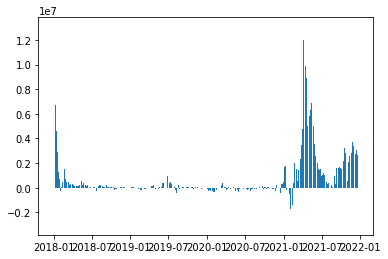

In [20]:
KR_Premium = df_BTCKRW['Close'] - df_BTCUSD['Close']
xs = KR_Premium.index.to_list()
ys = KR_Premium.to_list()
plt.bar(xs, ys)

<BarContainer object of 1450 artists>

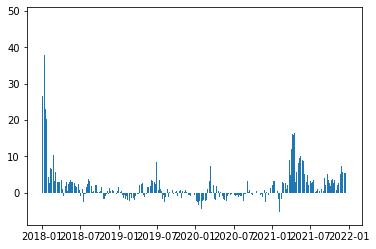

In [28]:
KR_Premium_to_Percent = (df_BTCKRW['Close'] / df_BTCUSD['Close']) * 100 - 100
xp = KR_Premium_to_Percent.index.to_list()
yp = KR_Premium_to_Percent.to_list()
plt.bar(xp, yp)

한국 시장(bithumb)의 비트코인 거래량

<BarContainer object of 1448 artists>

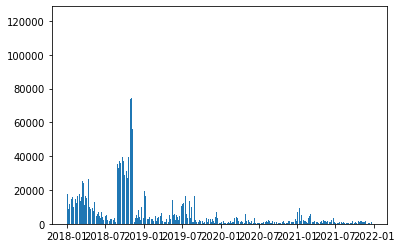

In [11]:
KR_Volume = df_BTCKRW['Volume']
x_s = KR_Volume.index.to_list()
y_s = KR_Volume.to_list()
plt.bar(x_s, y_s)

한국 프리미엄과 거래량의 상관 관계가 있는가?

In [12]:
correlation1 = KR_Volume.corr(KR_Premium)
print(correlation1)

-0.08090268845088192


변화량(상승, 하락)과 거래량의 상관 관계가 있는가? 그 외의 상관 관계는?

In [13]:
correlation2 = df_BTCKRW.corr(method='pearson')
print(correlation2)

           Close      Open      High       Low    Volume    Change
Close   1.000000  0.998698  0.999464  0.999428 -0.243822  0.032266
Open    0.998698  1.000000  0.999500  0.999274 -0.243225 -0.005450
High    0.999464  0.999500  1.000000  0.999161 -0.241929  0.013509
Low     0.999428  0.999274  0.999161  1.000000 -0.245790  0.015787
Volume -0.243822 -0.243225 -0.241929 -0.245790  1.000000 -0.013851
Change  0.032266 -0.005450  0.013509  0.015787 -0.013851  1.000000


<BarContainer object of 1448 artists>

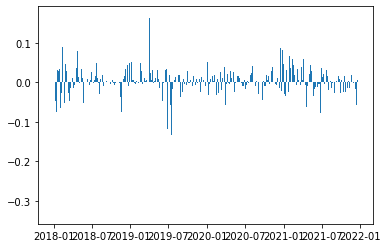

In [16]:
KR_Change = df_BTCKRW['Change']
x_c = KR_Change.index.to_list()
y_c = KR_Change.to_list()
plt.bar(x_c, y_c)

<BarContainer object of 1448 artists>

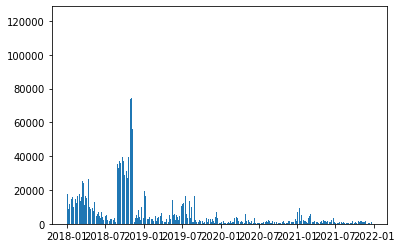

In [17]:
KR_Volume = df_BTCKRW['Volume']
x_s = KR_Volume.index.to_list()
y_s = KR_Volume.to_list()
plt.bar(x_s, y_s)